In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

C:\Users\ACER ASPIRE E15\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Calling the Machine Learning Algorithm that I would like to use in building my model

In [2]:
rfr = RandomForestClassifier(n_estimators=100)
gbr = GradientBoostingClassifier()

Now reading both the Train and Test data set using pandas

In [3]:
train = pd.read_csv(r"C:\Users\ACER ASPIRE E15\Documents\MY EXCEL\My Projects\DS Nigeria\Train.csv")
holdout = pd.read_csv(r"C:\Users\ACER ASPIRE E15\Documents\MY EXCEL\My Projects\DS Nigeria\Test.csv")

Checking both the Training and Test data set shape i.e. number of rows and columns in each data set

In [4]:
train.shape

(56000, 52)

In [5]:
holdout.shape

(24000, 51)

Dropping the 'Applicant_ID' column from the Training set

In [6]:
train = train.drop('Applicant_ID', axis=1)

In [7]:
def nan_values(df):
    train_null_col = []
    train_nonnull_col = []
    cols = [train_null_col, train_nonnull_col]
    for col in df.columns:
        if df[col].count() != len(df):
                train_null_col.append(col)
        else:
            train_nonnull_col.append(col)
    return cols
        
        


In [8]:
len(holdout)

24000

In [9]:
len(nan_values(holdout))

2

In [10]:
holdout.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50'],
      dtype='object')

In [11]:
print('Number of columns with null values in training dataset is: {}'.format(len(nan_values(train)[0])))
print('Number of columns without null values in training dataset is: {}'.format(len(nan_values(train)[1])))

Number of columns with null values in training dataset is: 48
Number of columns without null values in training dataset is: 3


In [12]:
print('Number of columns with null values in test dataset is: {}'.format(len(nan_values(holdout)[0])))
print('Number of columns without null values in test dataset is: {}'.format(len(nan_values(holdout)[1])))


Number of columns with null values in test dataset is: 47
Number of columns without null values in test dataset is: 4


In [13]:
holdout['Applicant_ID'].describe()

count             24000
unique            24000
top       Apcnt_1166296
freq                  1
Name: Applicant_ID, dtype: object

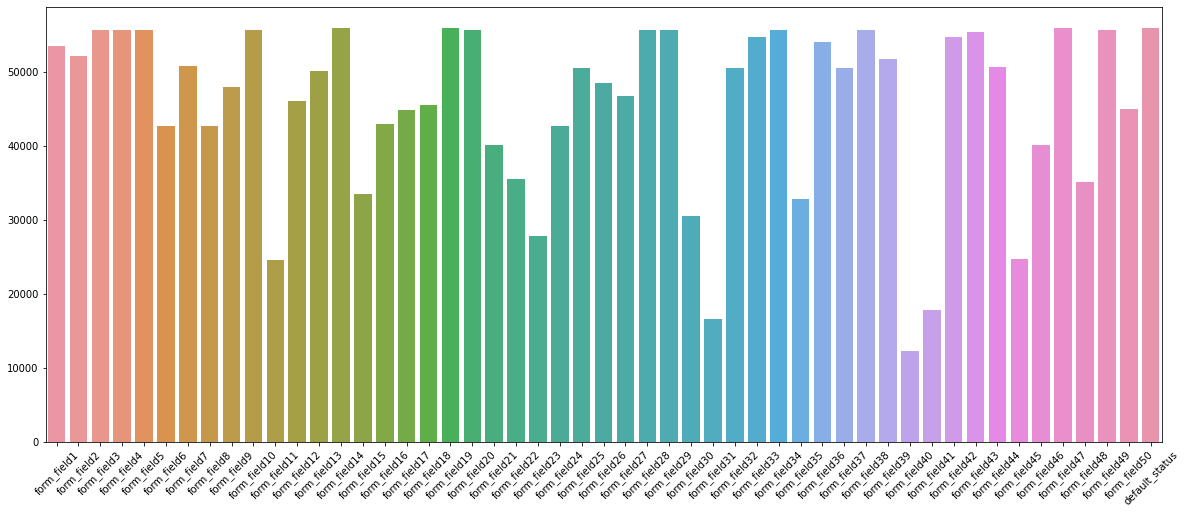

In [14]:
y = []
x = []
for col in train.columns:
    y.append(train[col].count())
    x.append(col)
fig, ax = plt.subplots(figsize=(20, 8))    
g = sns.barplot(x, y, ax=ax)
#g.set_xticklabels(rotation=60)
plt.xticks(rotation=45)
plt.show()

In [15]:
train.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [16]:
columns = []
for col in train.columns:
    columns.append(col)
    
len(columns)

51

In [17]:
float_col = []
int_col = []
object_col = []
for col in columns:
    if train.dtypes[col] == 'float64':
        float_col.append(col)
    elif train.dtypes[col] == 'int64':
        int_col.append(col)
    elif train.dtypes[col] =='object':
        object_col.append(col)

In [18]:
print(object_col)

['form_field47', 'default_status']


In [19]:
print(int_col)

['form_field14']


In [20]:
print(len(float_col))

48


In [21]:
train = train.dropna(thresh=36)

In [22]:
train.shape

(45546, 51)

In [23]:
train = train.fillna(0)

In [24]:
train['default_status'] = train['default_status'].map({'yes': 1, 'no': 0})

In [25]:
# Creating a function that creates dummy column for each unique value in a column
def create_dummies(df, column_name):
    """"This function creates dummy columns in a data, and replace the initial column with the dummy columns"""
    dummy = pd.get_dummies(df[column_name], prefix = column_name)
    df = pd.concat([df, dummy], axis = 1)
    df = df.drop(column_name, axis=1)
    return df

In [26]:
train = create_dummies(train, object_col[0])
holdout = create_dummies(holdout, object_col[0])

In [27]:
train[object_col[1]].describe()

count    45546.000000
mean         0.203465
std          0.402580
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default_status, dtype: float64

In [28]:
train[object_col[1]].unique()

array([0, 1], dtype=int64)

In [29]:
train[int_col].describe()

,form_field14
count,4.554600e+04
mean,5.316511e+07
std,1.052743e+09
min,0.000000e+00
25%,1.927495e+07
50%,2.891242e+07
75%,4.818738e+07
max,1.542150e+11


In [30]:
float_col_non_nan = []
for col in train.columns:
    float_col_non_nan.append(col)
        
float_col_non_nan.remove('default_status')
#float_col_non_nan.remove('form_field47')
len(float_col_non_nan)

51

In [31]:
float_col_non_nan1 = []
for col in train.columns[-2:]:
    float_col_non_nan1.append(col)
        
float_col_non_nan1

['form_field47_charge', 'form_field47_lending']

In [32]:
train[float_col_non_nan].describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,form_field47_charge,form_field47_lending
count,45546.000000,45546.000000,45546.000000,45546.000000,45546.000000,4.554600e+04,4.554600e+04,4.554600e+04,4.554600e+04,4.554600e+04,...,45546.000000,45546.000000,45546.000000,45546.000000,45546.000000,4.554600e+04,45546.000000,4.554600e+04,45546.000000,45546.000000
mean,3514.822948,0.514103,0.823709,0.649162,1.216199,5.757969e+05,7.381626e+06,2.446655e+06,1.369959e+07,1.413780e+07,...,0.251534,7.794381,0.545818,0.031529,0.050872,2.352712e+05,1.108354,5.848568e+05,0.626619,0.373381
std,276.011393,0.808966,1.846511,2.709405,7.661039,1.379553e+06,2.000636e+07,3.848382e+06,2.004456e+07,2.884978e+07,...,0.305011,6.350193,0.202091,0.195387,0.249673,1.452408e+06,1.788795,5.700871e+06,0.483707,0.483707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,3408.000000,0.048800,0.000000,0.000000,0.000000,3.501000e+03,8.865310e+05,1.155330e+05,1.568642e+06,1.388827e+06,...,0.000000,3.030000,0.399224,0.000000,0.000000,0.000000e+00,0.000000,3.597288e-02,0.000000,0.000000
50%,3512.000000,0.227175,0.000000,0.000000,0.000000,1.011400e+05,3.083992e+06,7.709980e+05,6.013940e+06,5.676872e+06,...,0.122221,6.060000,0.568416,0.000000,0.000000,1.490635e+02,0.274760,1.583418e-01,1.000000,0.000000
75%,3646.000000,0.676063,0.781400,0.000000,0.000000,4.247880e+05,7.547378e+06,3.359112e+06,1.788836e+07,1.653765e+07,...,0.425810,11.110000,0.732060,0.000000,0.000000,7.407079e+02,1.488927,4.817528e-01,1.000000,1.000000
max,3900.000000,18.015050,34.687800,91.672200,312.190200,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,2.200000,78.780000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,1.988498e+08,1.000000,1.000000


In [33]:
train[float_col_non_nan] = train[float_col_non_nan].fillna(0)

In [34]:
train[float_col_non_nan].describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,form_field47_charge,form_field47_lending
count,45546.000000,45546.000000,45546.000000,45546.000000,45546.000000,4.554600e+04,4.554600e+04,4.554600e+04,4.554600e+04,4.554600e+04,...,45546.000000,45546.000000,45546.000000,45546.000000,45546.000000,4.554600e+04,45546.000000,4.554600e+04,45546.000000,45546.000000
mean,3514.822948,0.514103,0.823709,0.649162,1.216199,5.757969e+05,7.381626e+06,2.446655e+06,1.369959e+07,1.413780e+07,...,0.251534,7.794381,0.545818,0.031529,0.050872,2.352712e+05,1.108354,5.848568e+05,0.626619,0.373381
std,276.011393,0.808966,1.846511,2.709405,7.661039,1.379553e+06,2.000636e+07,3.848382e+06,2.004456e+07,2.884978e+07,...,0.305011,6.350193,0.202091,0.195387,0.249673,1.452408e+06,1.788795,5.700871e+06,0.483707,0.483707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,3408.000000,0.048800,0.000000,0.000000,0.000000,3.501000e+03,8.865310e+05,1.155330e+05,1.568642e+06,1.388827e+06,...,0.000000,3.030000,0.399224,0.000000,0.000000,0.000000e+00,0.000000,3.597288e-02,0.000000,0.000000
50%,3512.000000,0.227175,0.000000,0.000000,0.000000,1.011400e+05,3.083992e+06,7.709980e+05,6.013940e+06,5.676872e+06,...,0.122221,6.060000,0.568416,0.000000,0.000000,1.490635e+02,0.274760,1.583418e-01,1.000000,0.000000
75%,3646.000000,0.676063,0.781400,0.000000,0.000000,4.247880e+05,7.547378e+06,3.359112e+06,1.788836e+07,1.653765e+07,...,0.425810,11.110000,0.732060,0.000000,0.000000,7.407079e+02,1.488927,4.817528e-01,1.000000,1.000000
max,3900.000000,18.015050,34.687800,91.672200,312.190200,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,2.200000,78.780000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,1.988498e+08,1.000000,1.000000


In [35]:
holdout[float_col_non_nan].describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,form_field47_charge,form_field47_lending
count,22890.000000,22291.000000,23854.000000,23854.000000,23854.000000,1.839600e+04,2.176900e+04,1.839600e+04,2.060000e+04,2.385300e+04,...,23422.000000,23750.000000,21638.000000,10462.000000,17115.000000,1.507800e+04,23854.000000,1.920300e+04,24000.000000,24000.000000
mean,3492.284404,0.557676,1.065443,0.859146,2.183538,6.263036e+05,6.797033e+06,2.654142e+06,1.350593e+07,1.187478e+07,...,0.369684,6.580480,0.566219,0.066526,0.097926,3.015440e+05,1.064118,6.749843e+05,0.644458,0.355542
std,190.502764,0.826543,2.198444,3.403115,11.415706,1.457540e+06,1.626022e+07,3.968185e+06,2.289125e+07,2.477113e+07,...,0.414077,6.363075,0.196060,0.278211,0.370392,1.868574e+06,1.816837,6.561031e+06,0.478687,0.478687
min,2986.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.066432,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,3356.000000,0.068675,0.000000,0.000000,0.000000,1.400400e+04,6.725810e+05,1.816630e+05,1.349441e+06,4.208980e+05,...,0.000000,2.020000,0.413268,0.000000,0.000000,7.272364e+01,0.000000,4.500510e-02,0.000000,0.000000
50%,3484.000000,0.273250,0.058200,0.000000,0.000000,1.155330e+05,2.719888e+06,9.594685e+05,5.529830e+06,3.651543e+06,...,0.220000,5.050000,0.592100,0.000000,0.000000,3.131754e+02,0.000000,1.680000e-01,1.000000,0.000000
75%,3624.000000,0.728850,1.304250,0.000000,0.000000,5.159112e+05,7.073576e+06,3.799849e+06,1.728658e+07,1.318126e+07,...,0.628573,10.100000,0.756544,0.000000,0.000000,1.195997e+03,1.254155,5.007093e-01,1.000000,1.000000
max,3900.000000,22.315050,34.541400,206.452800,297.885600,4.818738e+07,7.709887e+08,1.135141e+08,1.443921e+09,7.741014e+08,...,2.200000,91.910000,0.800000,5.000000,19.000000,1.213991e+08,24.000000,2.524591e+08,1.000000,1.000000


In [36]:
train[float_col_non_nan] = train[float_col_non_nan].fillna(0)

In [37]:
X = train.drop('default_status', axis=1)
y = train['default_status']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [39]:
rfr.fit(X_train[float_col_non_nan], y_train)
print(rfr.score(X_train[float_col_non_nan], y_train))
print(rfr.score(X_test[float_col_non_nan], y_test))

1.0
0.8286642662685518


In [40]:
feature = []
for col in int_col:
    float_col_non_nan.append(col)
    feature = float_col_non_nan

In [41]:
gbr.fit(X_train[float_col_non_nan], y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [42]:
gbr.fit(X_train[feature], y_train)
print(gbr.score(X_train[feature], y_train))
print(gbr.score(X_test[feature], y_test))

0.8395737580139934
0.8289277245982261


In [43]:
def plot_correlation_heatmap(df):
    corr = df.corr()
    sns.set(style='white')
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(20, 18))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap,vmax=0.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': 0.5})
    plt.show()

In [44]:
float_col_non_nan

['form_field1',
 'form_field2',
 'form_field3',
 'form_field4',
 'form_field5',
 'form_field6',
 'form_field7',
 'form_field8',
 'form_field9',
 'form_field10',
 'form_field11',
 'form_field12',
 'form_field13',
 'form_field14',
 'form_field15',
 'form_field16',
 'form_field17',
 'form_field18',
 'form_field19',
 'form_field20',
 'form_field21',
 'form_field22',
 'form_field23',
 'form_field24',
 'form_field25',
 'form_field26',
 'form_field27',
 'form_field28',
 'form_field29',
 'form_field30',
 'form_field31',
 'form_field32',
 'form_field33',
 'form_field34',
 'form_field35',
 'form_field36',
 'form_field37',
 'form_field38',
 'form_field39',
 'form_field40',
 'form_field41',
 'form_field42',
 'form_field43',
 'form_field44',
 'form_field45',
 'form_field46',
 'form_field48',
 'form_field49',
 'form_field50',
 'form_field47_charge',
 'form_field47_lending',
 'form_field14']

In [45]:
for col in float_col_non_nan1:
    float_col_non_nan.append(col)

In [46]:
float_col_non_nan = list(dict.fromkeys(float_col_non_nan))

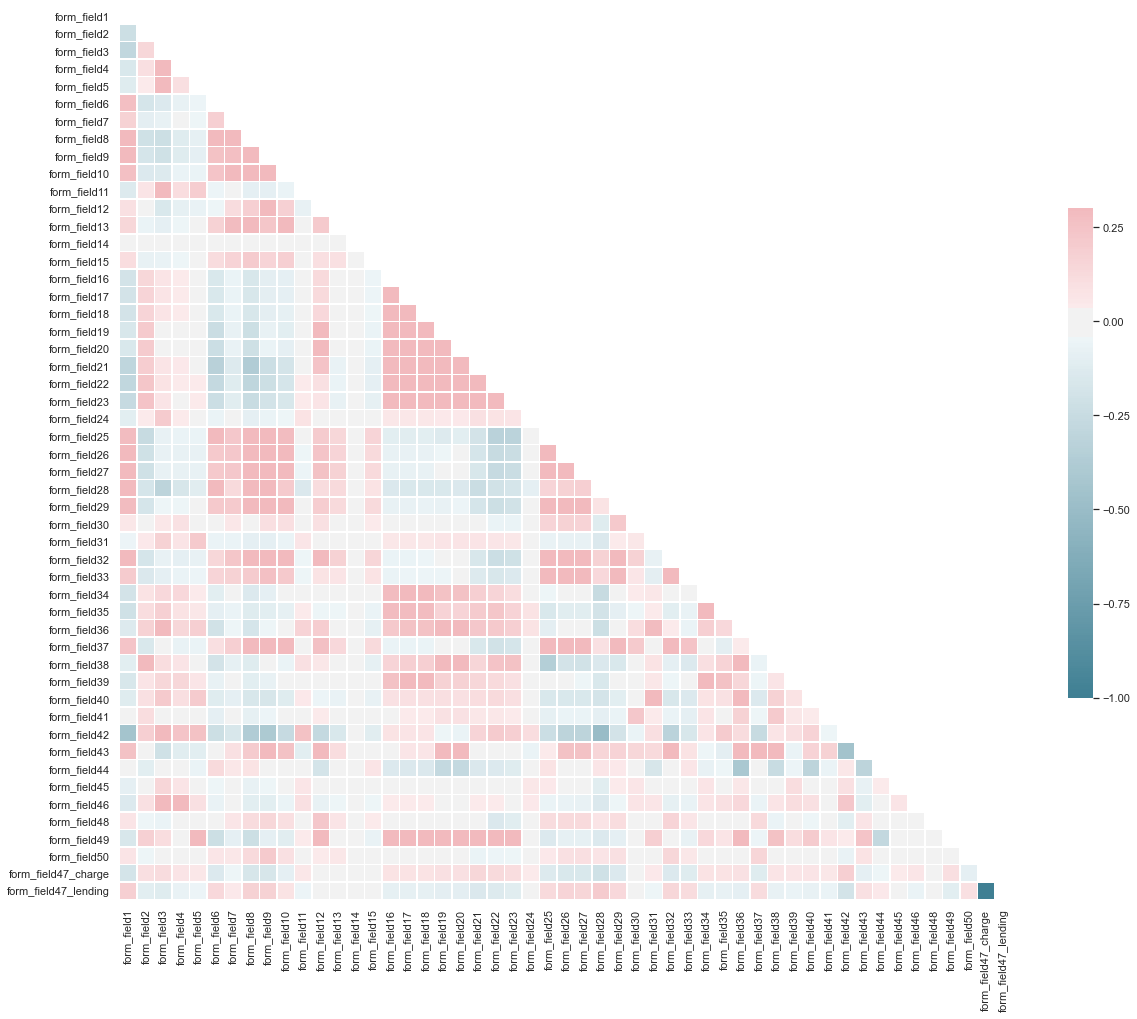

In [47]:
plot_correlation_heatmap(train[float_col_non_nan])

In [48]:
selector = RFECV(gbr, cv=5)
selector.fit(X_train[float_col_non_nan], y_train)
print(X_train[float_col_non_nan].columns[selector.support_])

Index(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field6', 'form_field7', 'form_field8', 'form_field9',
       'form_field10', 'form_field13', 'form_field15', 'form_field16',
       'form_field17', 'form_field18', 'form_field19', 'form_field21',
       'form_field22', 'form_field23', 'form_field24', 'form_field25',
       'form_field26', 'form_field28', 'form_field29', 'form_field30',
       'form_field31', 'form_field32', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field40',
       'form_field41', 'form_field42', 'form_field43', 'form_field45',
       'form_field49', 'form_field47_charge', 'form_field47_lending'],
      dtype='object')


In [49]:
optimized_columns = X_train[float_col_non_nan].columns[selector.support_]
optimized_columns

Index(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field6', 'form_field7', 'form_field8', 'form_field9',
       'form_field10', 'form_field13', 'form_field15', 'form_field16',
       'form_field17', 'form_field18', 'form_field19', 'form_field21',
       'form_field22', 'form_field23', 'form_field24', 'form_field25',
       'form_field26', 'form_field28', 'form_field29', 'form_field30',
       'form_field31', 'form_field32', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field40',
       'form_field41', 'form_field42', 'form_field43', 'form_field45',
       'form_field49', 'form_field47_charge', 'form_field47_lending'],
      dtype='object')

In [50]:
gbr.fit(X_train[optimized_columns], y_train)
print(gbr.score(X_train[optimized_columns], y_train))
print(gbr.score(X_test[optimized_columns], y_test))

0.8388711613337627
0.8293668218143497


In [51]:
gbr.feature_importances_

array([0.37633645, 0.09108468, 0.00458627, 0.00721845, 0.11684959,
       0.00490474, 0.01693183, 0.02550382, 0.0047927 , 0.00370352,
       0.00572463, 0.00333588, 0.00921728, 0.02383683, 0.02271001,
       0.01073448, 0.00767572, 0.01430933, 0.0160977 , 0.04062553,
       0.00494585, 0.00447274, 0.00250064, 0.0038737 , 0.00258988,
       0.00610488, 0.01432168, 0.01838063, 0.00759012, 0.02162882,
       0.00748279, 0.01040726, 0.00436485, 0.00552686, 0.00492943,
       0.00198415, 0.01203102, 0.03885641, 0.02182883])

In [52]:
importance = list(zip(optimized_columns, gbr.feature_importances_))
importance = pd.DataFrame(importance)
sort_importance = importance.sort_values(1, ascending=False)
sort_importance

,0,1
0,form_field1,0.376336
4,form_field6,0.116850
1,form_field2,0.091085
19,form_field25,0.040626
37,form_field47_charge,0.038856
7,form_field9,0.025504
13,form_field18,0.023837
14,form_field19,0.022710
38,form_field47_lending,0.021829
29,form_field37,0.021629


In [53]:
sort_importance1 = sort_importance[sort_importance[1]>=0.01]

In [54]:
sort_importance1

,0,1
0,form_field1,0.376336
4,form_field6,0.116850
1,form_field2,0.091085
19,form_field25,0.040626
37,form_field47_charge,0.038856
7,form_field9,0.025504
13,form_field18,0.023837
14,form_field19,0.022710
38,form_field47_lending,0.021829
29,form_field37,0.021629


In [55]:
new_col = list(sort_importance1[0])
gbr.fit(X_train[new_col], y_train)
print(gbr.score(X_train[new_col], y_train))
print(gbr.score(X_test[new_col], y_test))

0.8354460025176381
0.8264687801879336


In [56]:
gbr.feature_importances_

array([0.40258913, 0.12281549, 0.09844256, 0.0510217 , 0.03223516,
       0.03157673, 0.03720577, 0.02487274, 0.0318092 , 0.0251032 ,
       0.02226546, 0.01988509, 0.01856563, 0.01742746, 0.01964953,
       0.01390287, 0.0156419 , 0.01499037])

In [57]:
holdout[new_col] = holdout[new_col].fillna(0)

In [58]:
#holdout[optimized_columns] = holdout[optimized_columns].fillna(0)

In [59]:
holdout_prediction = gbr.predict(holdout[new_col])
holdout_prediction

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [61]:
#holdout_predictions = gbr.predict(holdout[optimized_columns])

In [63]:
#holdout_predictions

In [64]:
holdout[optimized_columns].describe()

,form_field1,form_field2,form_field3,form_field4,form_field6,form_field7,form_field8,form_field9,form_field10,form_field13,...,form_field37,form_field38,form_field40,form_field41,form_field42,form_field43,form_field45,form_field49,form_field47_charge,form_field47_lending
count,24000.000000,24000.000000,23854.000000,23854.000000,2.400000e+04,2.176900e+04,2.400000e+04,2.400000e+04,2.385300e+04,2.153700e+04,...,24000.000000,23853.000000,24000.000000,7651.000000,23422.000000,23750.000000,10462.000000,24000.000000,24000.000000,24000.000000
mean,3330.766250,0.517965,1.065443,0.859146,4.800617e+05,6.797033e+06,2.034400e+06,1.159259e+07,1.187478e+07,5.984000e+06,...,7.750417,8.506184,31.812817,108.209648,0.369684,6.580480,0.066526,1.057645,0.644458,0.355542
std,756.712886,0.809379,2.198444,3.403115,1.303287e+06,1.626022e+07,3.651080e+06,2.172448e+07,2.477113e+07,1.947650e+07,...,9.352425,7.833898,63.981527,36.426276,0.414077,6.363075,0.278211,1.813191,0.478687,0.478687
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3332.000000,0.046350,0.000000,0.000000,0.000000e+00,6.725810e+05,0.000000e+00,4.240100e+05,4.208980e+05,2.007240e+05,...,0.000000,4.000000,0.000000,87.499500,0.000000,2.020000,0.000000,0.000000,0.000000,0.000000
50%,3472.000000,0.228800,0.058200,0.000000,4.240100e+04,2.719888e+06,3.619645e+05,3.665936e+06,3.651543e+06,1.563391e+06,...,4.000000,6.000000,0.000000,117.984000,0.220000,5.050000,0.000000,0.000000,1.000000,0.000000
75%,3614.000000,0.680050,1.304250,0.000000,3.084770e+05,7.073576e+06,2.499811e+06,1.434048e+07,1.318126e+07,5.582150e+06,...,12.000000,12.000000,0.000000,137.207250,0.628573,10.100000,0.000000,1.235216,1.000000,1.000000
max,3900.000000,22.315050,34.541400,206.452800,4.818738e+07,7.709887e+08,1.135141e+08,1.443921e+09,7.741014e+08,1.387407e+09,...,120.000000,190.000000,401.413500,211.693500,2.200000,91.910000,5.000000,24.000000,1.000000,1.000000


In [ ]:
#holdout[optimized_columns] = holdout[optimized_columns].fillna(0)

In [ ]:
#holdout_predictions = gbr.predict(holdout[optimized_columns])

In [ ]:
#submission = {'Applicant_ID':holdout['Applicant_ID'],
#              'default_status': holdout_prediction}
#submission_df = pd.DataFrame(submission)
#submission_df.to_csv('submission_30d.csv', index=False)

In [ ]:
#submission_df['default_status'] = submission_df['default_status'].map({0: 'no', 1: 'yes'})

In [ ]:
#submission_df.head()

In [ ]:
#submission_df.to_csv('submission_28e.csv', index=False)

In [ ]:
#from sklearn.linear_model import LinearRegression

In [ ]:
#lr = LinearRegression()

In [ ]:
#train['default_status'] = train['default_status'].map({'yes': 1, 'no': 0})

In [ ]:
#lr.fit(X_train[optimized_columns], y_train)
#print(lr.score(X_train[optimized_columns], y_train))
#print(lr.score(X_test[optimized_columns], y_test))

In [ ]:
#train['default_status'].unique()

In [ ]:
#rfr.feature_importances_

In [ ]:
#importance = list(zip(float_col_non_nan, rfr.feature_importances_))
#importance = pd.DataFrame(importance)
#importance

In [ ]:
#sorted_values = importance.sort_values(1)
#plt.barh(sorted_values[0], sorted_values[0])

In [ ]:
#gbr.feature_importances_

In [65]:
selector = RFECV(gbr, cv=5)
selector.fit(X_train[new_col], y_train)
print(X_train[new_col].columns[selector.support_])

Index(['form_field1', 'form_field6', 'form_field2', 'form_field25',
       'form_field47_charge', 'form_field9', 'form_field18', 'form_field19',
       'form_field47_lending', 'form_field37', 'form_field35', 'form_field8',
       'form_field24', 'form_field34', 'form_field23', 'form_field49',
       'form_field21', 'form_field40'],
      dtype='object')


In [66]:
optimized_columns = X_train[new_col].columns[selector.support_]
optimized_columns

Index(['form_field1', 'form_field6', 'form_field2', 'form_field25',
       'form_field47_charge', 'form_field9', 'form_field18', 'form_field19',
       'form_field47_lending', 'form_field37', 'form_field35', 'form_field8',
       'form_field24', 'form_field34', 'form_field23', 'form_field49',
       'form_field21', 'form_field40'],
      dtype='object')

In [76]:
optimized_column = [] 
for col in optimized_columns:
    optimized_column.append(col)
    
    
optimized_column.remove('form_field49')

In [77]:
gbr.fit(X_train[optimized_column], y_train)
gbr.score(X_train[optimized_column], y_train)

0.8357094762727246

In [78]:
gbr.score(X_test[optimized_column], y_test)

0.8270835162905067

In [79]:
holdout_predictions = gbr.predict(holdout[optimized_column])

In [80]:
submission = {'Applicant_ID':holdout['Applicant_ID'],
              'default_status': holdout_prediction}
submission_df = pd.DataFrame(submission)
submission_df.to_csv('submission_03d.csv', index=False)